# A very short introduction to xarray

In [3]:
import xarray as xr
import numpy as np

## DataArray

In [64]:
firing_rate = np.random.randn(10,100,1000) # 10 unit, 100 trials, 1000 data points
Fs = 100 # time binned every 10ms
coords = {'unit': np.arange(firing_rate.shape[0]),
          'trial': np.arange(firing_rate.shape[1]),
         'time': np.arange(firing_rate.shape[2])/100} 

xa_unit_activity = xr.DataArray(firing_rate,
                                dims=['unit','trial','time'],
                                coords=coords)
xa_unit_activity

<xarray.DataArray (unit: 10, trial: 100, time: 1000)> Size: 8MB
array([[[-0.2187937 ,  0.53288068, -0.52637089, ..., -1.38905446,
         -1.69676948,  1.2927449 ],
        [-1.98213308, -0.11329785, -0.41945217, ..., -0.39137274,
         -0.67147394,  2.29029469],
        [ 2.12782733, -0.12081458,  0.31613566, ..., -0.14378975,
         -0.14943249,  1.08110529],
        ...,
        [ 0.23053406,  1.55966375, -1.50054594, ...,  0.99161395,
          0.35692225, -1.54439601],
        [ 0.57760436, -0.21462505,  0.45551935, ...,  0.28762106,
          0.42201574,  0.83508142],
        [-0.98618565, -0.96786668,  0.88739003, ...,  0.38755208,
         -0.48132406, -0.42361303]],

       [[ 1.46740298,  2.02621631, -0.6503858 , ..., -0.25641079,
         -0.011399  ,  0.15807274],
        [ 0.84592063, -1.57455433, -1.89742562, ...,  1.30518102,
         -1.60382818,  1.42461401],
        [ 0.96880384, -1.30695963, -1.38619736, ...,  1.42658227,
          0.34122012,  0.42961769],
...
        [ 1.56496482,  1.28937517,  0.95218414, ...,  0.33069819,
          1.87649711,  0.58114406],
        [ 0.44437807, -1.46497117,  1.7018078 , ..., -0.95584621,
         -0.1856614 , -0.30017069],
        [ 1.55817742, -0.5557964 , -1.9331671 , ..., -0.96769412,
          0.00867238, -0.29860733]],

       [[-0.79350962, -1.00589138,  1.43773465, ..., -0.77091389,
         -0.46514448, -0.17751889],
        [ 0.47155414,  0.11912532,  0.09035469, ..., -0.15290922,
          2.47458069,  0.45167507],
        [-0.84780275,  1.49730534, -0.44135502, ...,  0.24293184,
         -0.40701915, -0.78418404],
        ...,
        [ 0.58937457,  0.85953508,  0.6673382 , ...,  0.43235892,
          0.19962662,  0.80953622],
        [-1.8148949 , -1.12763271,  0.35242861, ...,  0.13991441,
         -1.88405462, -0.01676114],
        [-0.6031168 ,  2.37436233,  0.91961887, ..., -1.34775194,
          0.05604694, -0.68750132]]], shape=(10, 100, 1000))
Coordinates:
  * unit     (unit) int64 80B 0 1 2 3 4 5 6 7 8 9
  * trial    (trial) int64 800B 0 1 2 3 4 5 6 7 8 ... 91 92 93 94 95 96 97 98 99
  * time     (time) float64 8kB 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99

In [21]:
trial_outcome = np.random.choice(['success','failure'], size=100)
xa_trial_outcome = xr.DataArray(trial_outcome,
                                dims = ['trial'],
                                coords = {'trial': np.arange(len(trial_outcome))})

xa_trial_outcome

<xarray.DataArray (trial: 100)> Size: 3kB
array(['success', 'failure', 'success', 'success', 'failure', 'failure',
       'failure', 'success', 'success', 'failure', 'success', 'failure',
       'success', 'failure', 'failure', 'failure', 'failure', 'failure',
       'failure', 'failure', 'failure', 'failure', 'failure', 'success',
       'success', 'success', 'failure', 'failure', 'success', 'success',
       'success', 'success', 'success', 'success', 'failure', 'success',
       'failure', 'success', 'failure', 'failure', 'failure', 'failure',
       'success', 'failure', 'failure', 'success', 'failure', 'failure',
       'failure', 'failure', 'failure', 'success', 'success', 'success',
       'success', 'success', 'failure', 'success', 'success', 'success',
       'failure', 'failure', 'failure', 'success', 'success', 'failure',
       'success', 'success', 'success', 'success', 'failure', 'success',
       'success', 'failure', 'success', 'success', 'success', 'success',
       'success', 'success', 'success', 'failure', 'success', 'failure',
       'success', 'failure', 'success', 'success', 'success', 'failure',
       'success', 'failure', 'failure', 'failure', 'success', 'failure',
       'success', 'success', 'success', 'failure'], dtype='<U7')
Coordinates:
  * trial    (trial) int64 800B 0 1 2 3 4 5 6 7 8 ... 91 92 93 94 95 96 97 98 99

## Dataset

In [22]:
session_data = xr.Dataset({'unit_activity': xa_unit_activity, 
                           'trial_outcome': xa_trial_outcome})

session_data

<xarray.Dataset> Size: 8MB
Dimensions:        (unit: 10, trial: 100, time: 1000)
Coordinates:
  * unit           (unit) int64 80B 0 1 2 3 4 5 6 7 8 9
  * trial          (trial) int64 800B 0 1 2 3 4 5 6 7 ... 93 94 95 96 97 98 99
  * time           (time) float64 8kB 0.0 0.01 0.02 0.03 ... 9.96 9.97 9.98 9.99
Data variables:
    unit_activity  (unit, trial, time) float64 8MB 1.177 0.6764 ... -1.418
    trial_outcome  (trial) <U7 3kB 'success' 'failure' ... 'success' 'failure'

## Real example

In [58]:
xr_session = xr.load_dataset('xr_spikes.nc')
xr_session

<xarray.Dataset> Size: 56MB
Dimensions:                   (trial_nb: 234, cluID: 50, spk_event_time: 50,
                               spikes_FR.spout_idx: 185,
                               spikes_FR.bar_off_idx: 1009,
                               spikes_FR.lick_idx: 452,
                               spikes_zFR.spout_idx: 185,
                               spikes_zFR.bar_off_idx: 1009,
                               spikes_zFR.lick_idx: 452)
Coordinates:
  * trial_nb                  (trial_nb) float64 2kB 1.0 2.0 3.0 ... 233.0 234.0
  * cluID                     (cluID) <U33 7kB 'RE015-2024-07-17-175056_Probe...
  * spk_event_time            (spk_event_time) float64 400B -1.955e+03 ... 2....
  * spikes_FR.spout_idx       (spikes_FR.spout_idx) int64 1kB 0 1 2 ... 183 184
  * spikes_zFR.spout_idx      (spikes_zFR.spout_idx) int64 1kB 0 1 2 ... 183 184
  * spikes_FR.bar_off_idx     (spikes_FR.bar_off_idx) int64 8kB 0 1 ... 1008
  * spikes_zFR.bar_off_idx    (spikes_zFR.bar_off_idx) int64 8kB 0 1 ... 1008
  * spikes_FR.lick_idx        (spikes_FR.lick_idx) int64 4kB 0 1 2 ... 450 451
  * spikes_zFR.lick_idx       (spikes_zFR.lick_idx) int64 4kB 0 1 2 ... 450 451
Data variables: (12/14)
    trial_outcome             (trial_nb) <U10 9kB 'aborted' ... 'no_reach'
    ks_chan_pos_x             (cluID) float32 200B 59.0 43.0 11.0 ... 27.0 43.0
    ks_chan_pos_y             (cluID) float32 200B 40.0 20.0 ... 560.0 540.0
    probe_name                (cluID) <U6 1kB 'ProbeA' 'ProbeA' ... 'ProbeA'
    maxWaveformCh             (cluID) int64 400B 2 0 5 4 10 ... 53 55 53 55 52
    ks_labels                 (cluID) <U4 800B 'good' 'good' ... 'good' 'good'
    ...                        ...
    spikes_FR.last_bar_off    (trial_nb, spk_event_time, cluID) float64 5MB 2...
    spikes_FR.first_spout     (trial_nb, spk_event_time, cluID) float64 5MB 5...
    spikes_FR.spout           (spikes_FR.spout_idx, spk_event_time, cluID) float64 4MB ...
    spikes_FR.bar_off         (spikes_FR.bar_off_idx, spk_event_time, cluID) float64 20MB ...
    spikes_FR.lick            (spikes_FR.lick_idx, spk_event_time, cluID) float64 9MB ...
    spikes_FR.reward          (trial_nb, spk_event_time, cluID) float64 5MB 5...
Attributes:
    bin_duration:  10
    sigma_ms:      20
    kernel:        ExponentialKernel
    trial_window:  [-2000.  3000.]
    session_id:    RE015-2024-07-17-175056

### Heat map of unit activity across trials

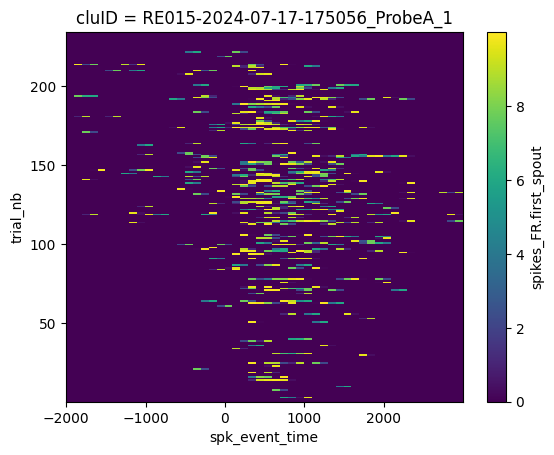

In [65]:
xr_coarse.sel(cluID= xr_coarse.cluID[1])['spikes_FR.first_spout'].plot()

### Average firing rate

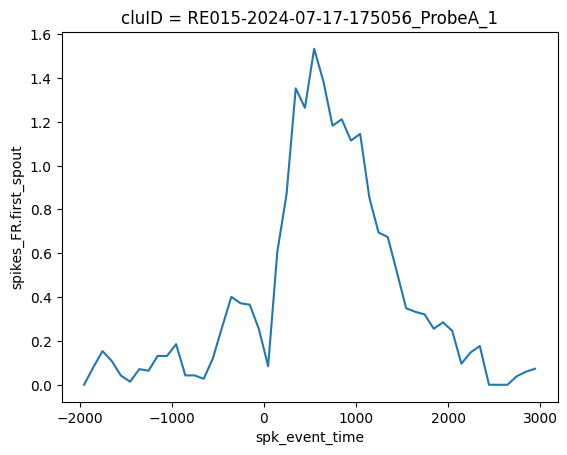

In [66]:
xr_coarse.sel(cluID= xr_coarse.cluID[1])['spikes_FR.first_spout'].mean(dim='trial_nb').plot()

### Average firing rate in different trial outcomes

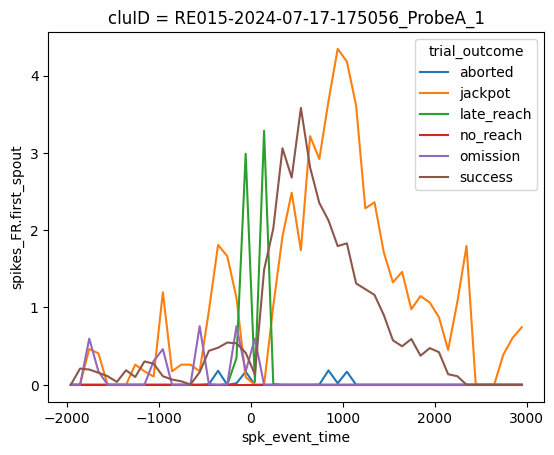

In [67]:
(xr_coarse.sel(cluID= xr_coarse.cluID[1])['spikes_FR.first_spout'] # Select a particular unit and activity
    .groupby(xr_coarse.trial_outcome) # Group the trial by trial outcome
    .mean(dim='trial_nb')             # Take average across trials
     .plot(hue='trial_outcome'));      # Plot the trial outcome in different colours